# PROBLEM STATEMENT: Classification whether the person taking the loan will be a defaulter or not 

## Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Load the dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/priyanshugithub2003/Datasets_Data_Science/main/credit.csv")

### Explore the dataset and look for the missing values in any form

In [3]:
df.shape

(1000, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [5]:
# To increase the limit of the max number of rows and columns displayed
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [6]:
df.sample(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
634,1 - 200 DM,24,good,car,1355,< 100 DM,< 1 year,3,4,25,none,own,1,unskilled,1,yes,yes
55,unknown,6,very good,car,783,unknown,1 - 4 years,1,2,26,store,own,1,unskilled,2,no,no
557,unknown,21,perfect,car,5003,unknown,1 - 4 years,1,4,29,bank,own,2,skilled,1,yes,yes
84,< 0 DM,10,good,furniture/appliances,2315,< 100 DM,> 7 years,3,4,52,none,own,1,unskilled,1,no,no
640,< 0 DM,18,good,education,750,< 100 DM,unemployed,4,1,27,none,own,1,unemployed,1,no,yes
907,1 - 200 DM,36,good,education,3711,unknown,1 - 4 years,2,2,27,none,own,1,skilled,1,no,no
199,1 - 200 DM,18,poor,furniture/appliances,4297,< 100 DM,> 7 years,4,3,40,none,own,1,management,1,yes,yes
741,1 - 200 DM,10,very good,furniture/appliances,1048,< 100 DM,1 - 4 years,4,4,23,store,own,1,unskilled,1,no,no
725,unknown,6,critical,car,250,> 1000 DM,1 - 4 years,2,2,41,bank,own,2,unskilled,1,no,no
332,1 - 200 DM,60,good,car,7408,100 - 500 DM,< 1 year,4,2,24,none,own,1,management,1,no,yes


In [7]:
df.describe(include = 'all')

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
count,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000
unique,4,NaN,5,6,NaN,5,5,NaN,NaN,NaN,3,3,NaN,4,NaN,2,2
top,unknown,NaN,good,furniture/appliances,NaN,< 100 DM,1 - 4 years,NaN,NaN,NaN,none,own,NaN,skilled,NaN,no,no
freq,394,NaN,530,473,NaN,603,339,NaN,NaN,NaN,814,713,NaN,630,NaN,596,700
mean,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,2.845000,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN
std,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,1.103718,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN
min,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,1.000000,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
25%,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,2.000000,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
50%,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,3.000000,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
75%,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,4.000000,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN


<AxesSubplot:xlabel='percent_of_income', ylabel='count'>

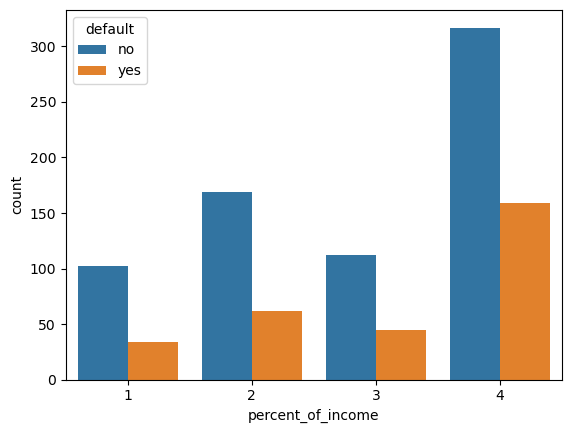

In [8]:
sns.countplot(x=df['percent_of_income'],hue=df['default'])

<AxesSubplot:xlabel='default', ylabel='count'>

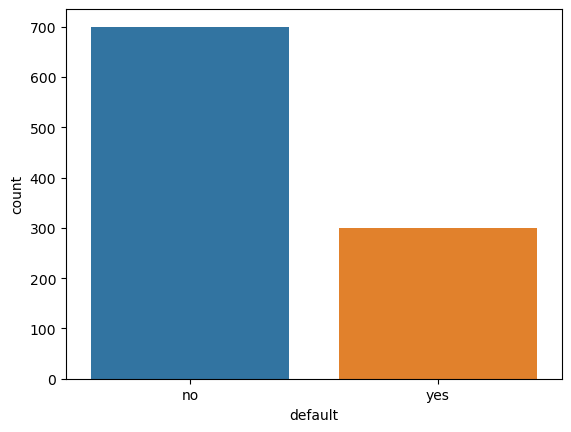

In [9]:
sns.countplot(x=df['default'])

<AxesSubplot:xlabel='months_loan_duration', ylabel='count'>

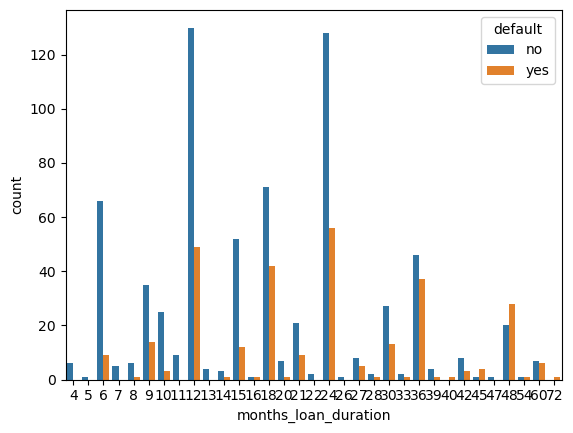

In [10]:
sns.countplot(x=df['months_loan_duration'],hue=df['default'])
# There is greater chance of default if the loan is of greater duration

<AxesSubplot:ylabel='amount'>

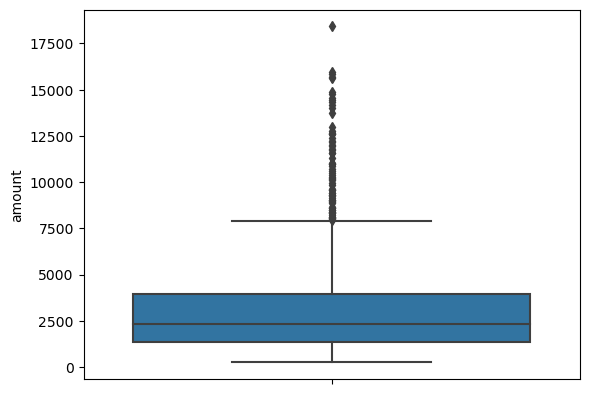

In [11]:
sns.boxplot(y=df['amount'])
# Outliers in amount column

## Understanding relation of one attribute with another

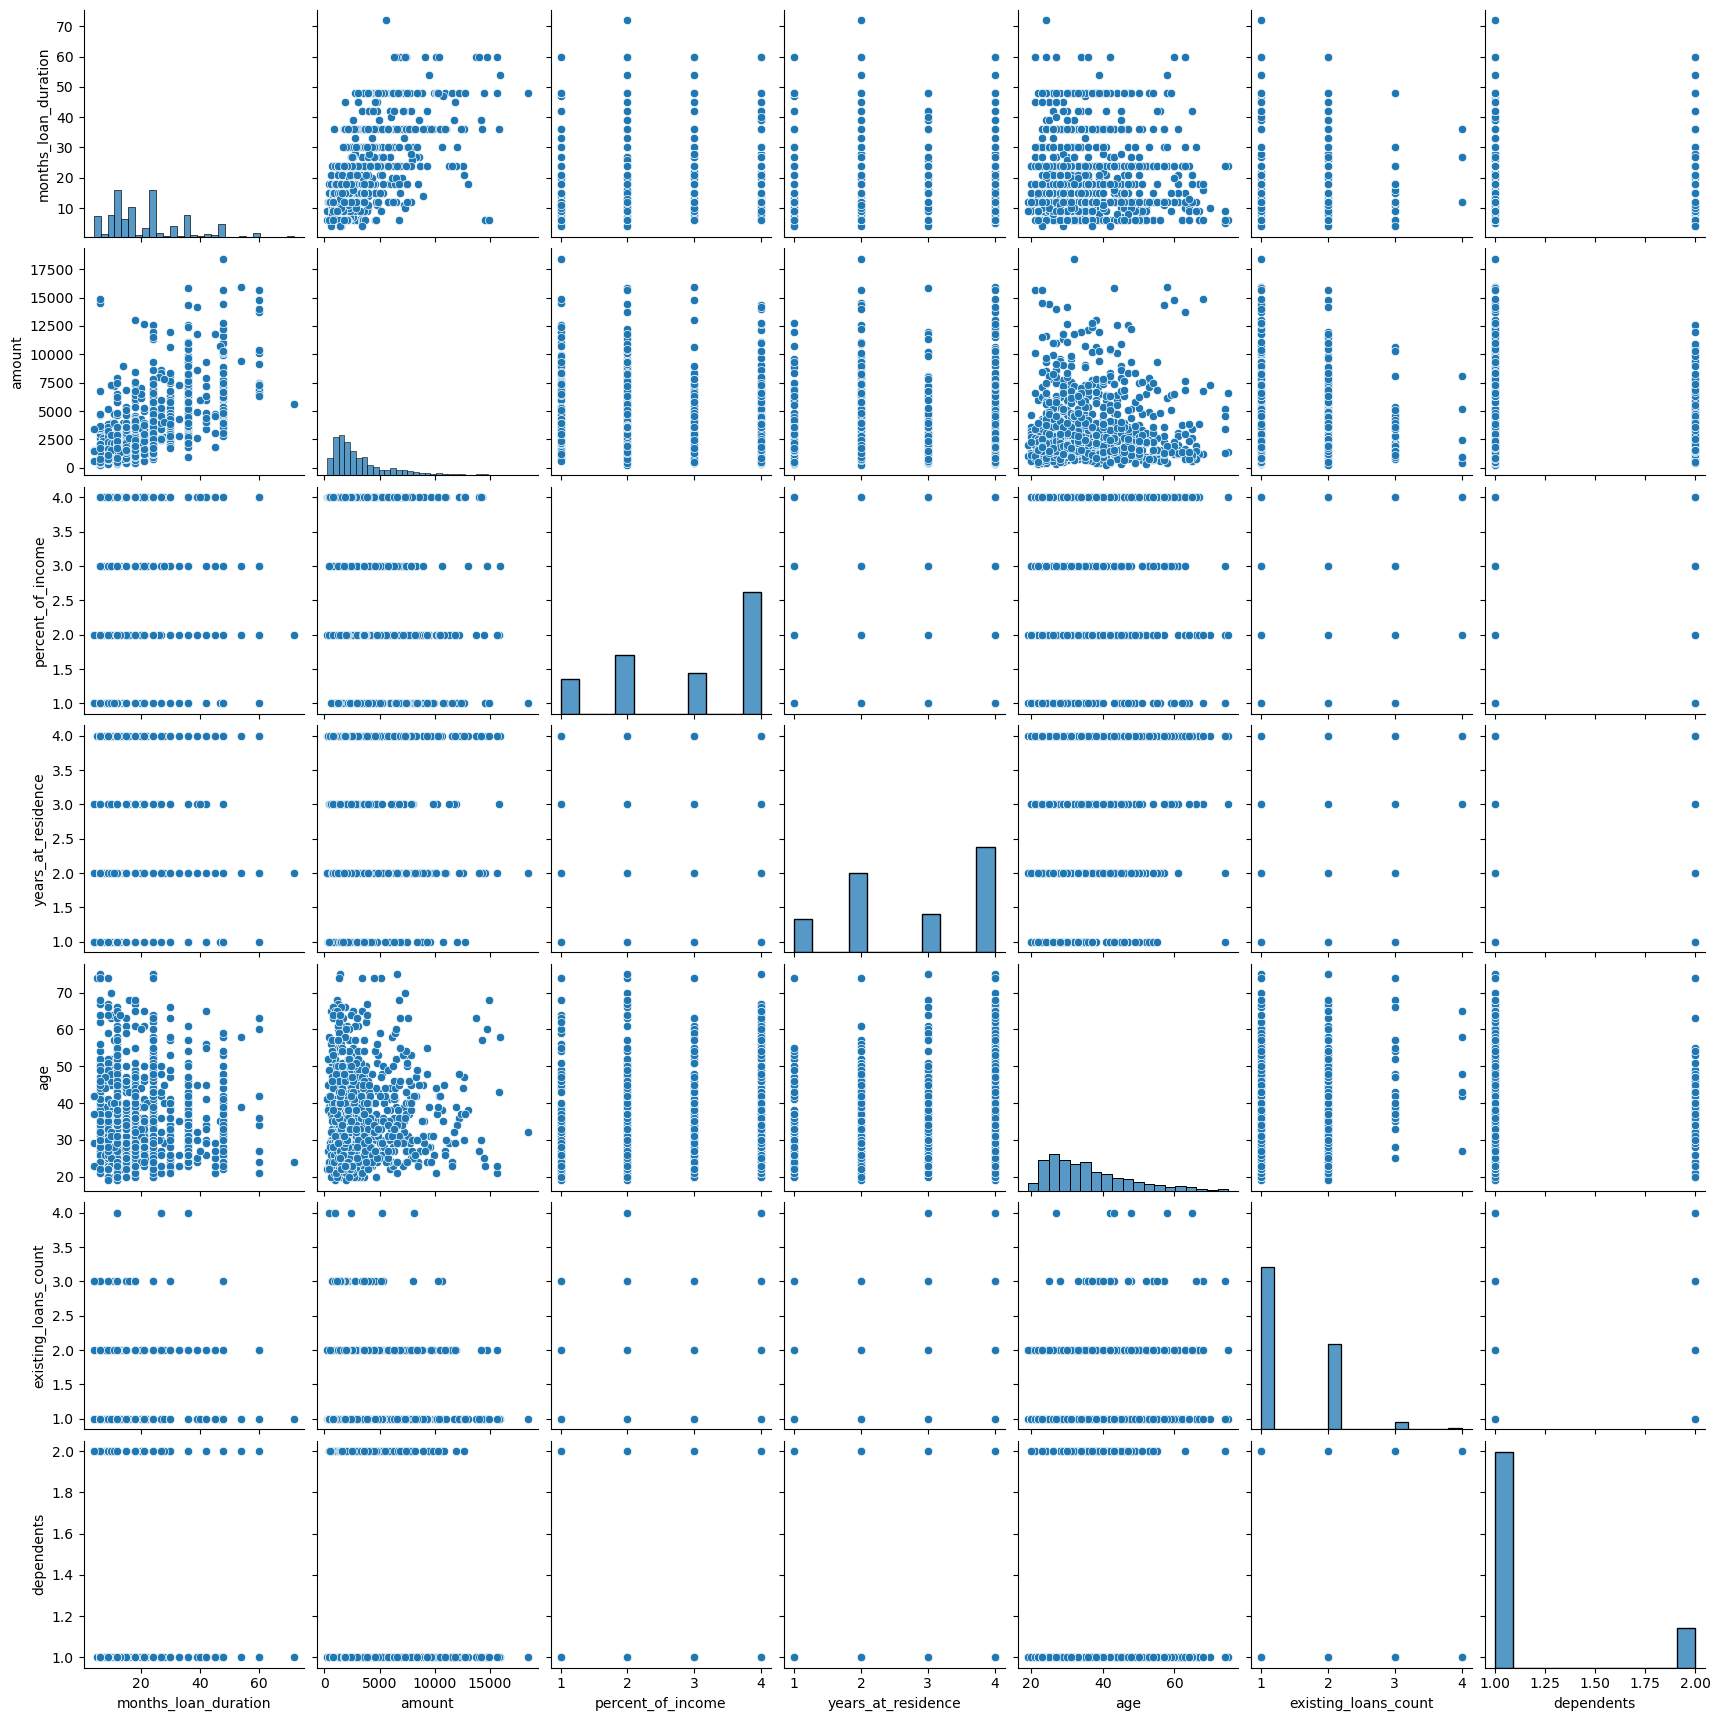

In [12]:
sns.pairplot(df)

## Remove the outliers

In [13]:
Q1, Q3 = df['amount'].quantile([0.25,0.75])
IQR =Q3-Q1
low = IQR - 1.5*IQR
up = IQR + 1.5*IQR

In [14]:
df['amount']= np.where(df['amount']>up,up,df['amount'])
df['amount']= np.where(df['amount']<low,low,df['amount'])

<AxesSubplot:>

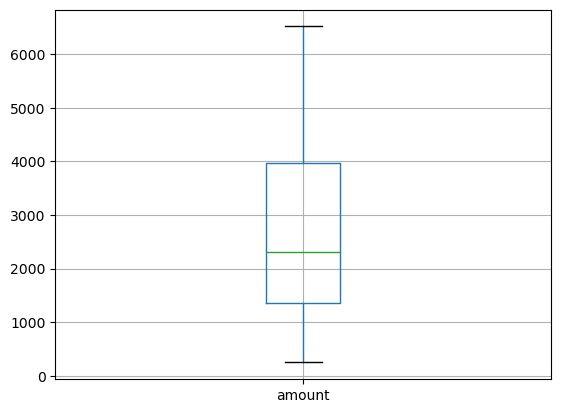

In [15]:
df.boxplot(column='amount')

## Scale the data to prevent the model from being biased

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
ssc = StandardScaler()

In [18]:
df['amount'] = ssc.fit_transform(df[['amount']])
df['months_loan_duration'] = ssc.fit_transform(df[['months_loan_duration']])
df['percent_of_income'] = ssc.fit_transform(df[['percent_of_income']])
df['years_at_residence'] = ssc.fit_transform(df[['years_at_residence']])
df['age'] = ssc.fit_transform(df[['age']])
df['existing_loans_count'] = ssc.fit_transform(df[['existing_loans_count']])
df['dependents'] = ssc.fit_transform(df[['dependents']])

In [19]:
df.sample(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
500,< 0 DM,0.256953,good,car,0.108079,< 100 DM,< 1 year,0.918477,-1.672459,-0.751642,none,own,-0.704926,skilled,-0.42829,no,yes
317,1 - 200 DM,0.256953,good,furniture/appliances,0.750170,unknown,1 - 4 years,-1.764514,1.046987,1.095360,none,own,-0.704926,unskilled,-0.42829,yes,no
768,1 - 200 DM,-0.738668,critical,furniture/appliances,0.366379,< 100 DM,> 7 years,-1.764514,1.046987,-0.663689,none,rent,2.759084,skilled,-0.42829,yes,no
847,unknown,0.256953,good,car,-0.871789,< 100 DM,< 1 year,0.918477,-0.765977,-0.663689,none,own,-0.704926,skilled,-0.42829,no,no
306,unknown,0.754763,good,car,0.990692,unknown,4 - 7 years,-0.870183,1.046987,-1.015499,store,rent,-0.704926,unskilled,-0.42829,no,no
213,> 200 DM,0.754763,poor,business,-0.527214,< 100 DM,> 7 years,0.918477,1.046987,2.678504,none,own,-0.704926,management,-0.42829,yes,yes
326,unknown,-0.738668,critical,furniture/appliances,1.508338,unknown,> 7 years,-0.870183,1.046987,1.183312,none,rent,-0.704926,skilled,-0.42829,yes,no
254,1 - 200 DM,-0.987573,good,furniture/appliances,-0.463423,unknown,4 - 7 years,-0.870183,-1.672459,-1.015499,none,own,-0.704926,skilled,-0.42829,yes,no
585,< 0 DM,-0.240857,good,furniture/appliances,-0.458718,< 100 DM,1 - 4 years,-1.764514,1.046987,-1.367309,bank,rent,-0.704926,skilled,-0.42829,no,yes
839,unknown,0.256953,critical,furniture/appliances,-0.159633,< 100 DM,> 7 years,0.918477,0.140505,0.919455,none,own,1.027079,skilled,-0.42829,no,no


## One Hot Encoding

In [20]:
columns = ['checking_balance','credit_history','purpose','savings_balance','employment_duration','other_credit','housing','job','phone']

In [21]:
dummies = pd.get_dummies(df[columns],columns,drop_first=True)

In [22]:
dummies.sample(10)

,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_500 - 1000 DM,savings_balance_< 100 DM,savings_balance_> 1000 DM,savings_balance_unknown,employment_duration_4 - 7 years,employment_duration_< 1 year,employment_duration_> 7 years,employment_duration_unemployed,other_credit_none,other_credit_store,housing_own,housing_rent,job_skilled,job_unemployed,job_unskilled,phone_yes
552,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1
532,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0
101,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0
949,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0
112,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0
403,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
615,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
379,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
400,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1
963,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1


In [23]:
dummies.shape

(1000, 28)

In [24]:
df = pd.concat([df,dummies],axis =1)
df.drop(columns,axis=1,inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   months_loan_duration             1000 non-null   float64
 1   amount                           1000 non-null   float64
 2   percent_of_income                1000 non-null   float64
 3   years_at_residence               1000 non-null   float64
 4   age                              1000 non-null   float64
 5   existing_loans_count             1000 non-null   float64
 6   dependents                       1000 non-null   float64
 7   default                          1000 non-null   object 
 8   checking_balance_< 0 DM          1000 non-null   uint8  
 9   checking_balance_> 200 DM        1000 non-null   uint8  
 10  checking_balance_unknown         1000 non-null   uint8  
 11  credit_history_good              1000 non-null   uint8  
 12  credit_history_perfec

# Split data

In [26]:
x = df.drop(['default'],axis=1)
y = df[['default']]

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

# Logistic Regression

In [28]:
reg = LogisticRegression()
reg.fit(x_train,y_train)

C:\Users\priyanshu\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [29]:
reg.score(x_train,y_train),reg.score(x_test,y_test)

(0.78, 0.7533333333333333)

In [30]:
prediction = reg.predict(x_test)

## Ways to present different scores

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [32]:
accuracy_score(y_test,prediction)

0.7533333333333333

In [33]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

          no       0.80      0.87      0.83       214
         yes       0.59      0.45      0.51        86

    accuracy                           0.75       300
   macro avg       0.70      0.66      0.67       300
weighted avg       0.74      0.75      0.74       300



<AxesSubplot:>

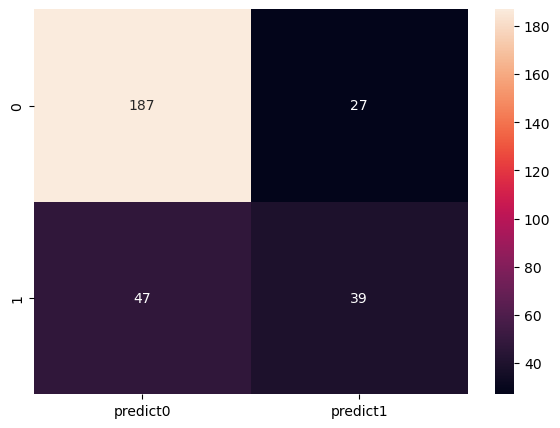

In [34]:
cm = confusion_matrix(y_test,prediction)
df1 = pd.DataFrame(cm, index=[i for i in ['0','1']],columns=[i for i in ['predict0','predict1']])
plt.figure(figsize=(7,5))
sns.heatmap(df1,annot=True,fmt='g')

# Support Vector Classifier Algorithm

### Kernel = linear

In [35]:
from sklearn.svm import SVC
clf = SVC(kernel='linear',random_state=1,C=2)
clf.fit(x_train,y_train)

C:\Users\priyanshu\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=2, kernel='linear', random_state=1)

In [36]:
clf.score(x_train,y_train), clf.score(x_test,y_test)

(0.7728571428571429, 0.7466666666666667)

### Kernel = rbf

In [37]:
clf = SVC(kernel='rbf',gamma='scale',C=0.5,random_state=1)
clf.fit(x_train,y_train)

C:\Users\priyanshu\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.5, random_state=1)

In [38]:
clf.score(x_train,y_train), clf.score(x_test,y_test)

(0.78, 0.7433333333333333)

### Kernel = poly

In [39]:
clf = SVC(kernel='poly',degree=1,C=6)
clf.fit(x_train,y_train)

C:\Users\priyanshu\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=6, degree=1, kernel='poly')

In [40]:
clf.score(x_train,y_train), clf.score(x_test,y_test)

(0.7728571428571429, 0.76)

### Kernel = sigmoid

In [41]:
clf = SVC(kernel='sigmoid',C=10,coef0=3)
clf.fit(x_train,y_train)

C:\Users\priyanshu\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, coef0=3, kernel='sigmoid')

In [42]:
clf.score(x_train,y_train), clf.score(x_test,y_test)

(0.6942857142857143, 0.73)

# KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
KNN = KNeighborsClassifier(n_neighbors=6, weights='uniform',p=2)#p=1 means manhattan, p=2 means euclidean , bracket terms are hyperparamteters
KNN.fit(x_train,y_train)

C:\Users\priyanshu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=6)

In [45]:
KNN.score(x_train,y_train), KNN.score(x_test,y_test)

C:\Users\priyanshu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\priyanshu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set 

(0.7771428571428571, 0.7433333333333333)

# Decision Tree ensemble

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
tree = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1)
tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [48]:
tree.score(x_train,y_train), tree.score(x_test,y_test)

(0.7657142857142857, 0.76)

# Ensemble Learning - Bagging

In [49]:
from sklearn.ensemble import BaggingClassifier

In [50]:
bgcl = BaggingClassifier(n_estimators=450, max_samples=60,random_state=1)
bgcl.fit(x_train,y_train)

C:\Users\priyanshu\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(max_samples=60, n_estimators=450, random_state=1)

In [51]:
bgcl.score(x_train,y_train), bgcl.score(x_test,y_test)

(0.8028571428571428, 0.7533333333333333)

# Ensemble Learning - AdaBoosting

In [52]:
from sklearn.ensemble import AdaBoostClassifier

In [53]:
abcl = AdaBoostClassifier(n_estimators=40,learning_rate=0.5,random_state=1)
abcl.fit(x_train,y_train)

C:\Users\priyanshu\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(learning_rate=0.5, n_estimators=40, random_state=1)

In [54]:
abcl.score(x_train,y_train), abcl.score(x_test,y_test)

(0.7942857142857143, 0.7633333333333333)

# Ensemble Learning - GradientBoost

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
gbcl = GradientBoostingClassifier(learning_rate=0.3,loss='exponential',criterion='squared_error',n_estimators=300,max_depth=1,max_features=15,random_state=1)
gbcl.fit(x_train,y_train)
gbcl.score(x_train,y_train), gbcl.score(x_test,y_test)

C:\Users\priyanshu\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.7971428571428572, 0.7533333333333333)

# Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rfcl = RandomForestClassifier(n_estimators=500,criterion='entropy',random_state=1, min_samples_split=60)
rfcl.fit(x_train,y_train)
rfcl.score(x_train,y_train), rfcl.score(x_test,y_test)

C:\Users\priyanshu\AppData\Local\Temp\ipykernel_13740\142089258.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfcl.fit(x_train,y_train)


(0.7814285714285715, 0.7333333333333333)